In [15]:
import pandas as pd
import numpy as np

#import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette
palette = {0: 'indianred', 1: 'steelblue'}

#read in the main dataset
df = pd.read_csv('final_dataset_Nov_27.csv')

In [16]:
list(df.columns)

['ENT_SEM',
 'GRAD_SEM',
 '25',
 '101',
 '104',
 '105',
 '140',
 '142',
 '143',
 '150',
 '151',
 '160',
 '165',
 '166',
 '201',
 '207',
 '240',
 '265',
 '266',
 '267',
 '301',
 '302',
 '304',
 '314',
 '317',
 '341',
 '342',
 '350',
 '365',
 '373',
 '385',
 '397',
 '414',
 '415',
 '435',
 '436',
 '492',
 '495',
 '500',
 'Y',
 'SEM0.5_cdf',
 'SEM1.0_cdf',
 'SEM1.5_cdf',
 'SEM2.0_cdf',
 'SEM2.5_cdf',
 'SEM3.0_cdf',
 'SEM3.5_cdf',
 'SEM4.0_cdf',
 'SEM4.5_cdf',
 'SEM5.0_cdf',
 'SEM5.5_cdf',
 'SEM6.0_cdf',
 'SEM6.5_cdf',
 'SEM7.0_cdf',
 'SEM7.5_cdf',
 'SEM8.0_cdf',
 'SEM8.5_cdf',
 'SEM9.0_cdf',
 'SEM9.5_cdf',
 'SEM0.5_MATH_cdf',
 'SEM1.0_MATH_cdf',
 'SEM1.5_MATH_cdf',
 'SEM2.0_MATH_cdf',
 'SEM2.5_MATH_cdf',
 'SEM3.0_MATH_cdf',
 'SEM3.5_MATH_cdf',
 'SEM4.0_MATH_cdf',
 'SEM4.5_MATH_cdf',
 'SEM5.0_MATH_cdf',
 'SEM5.5_MATH_cdf',
 'SEM6.0_MATH_cdf',
 'SEM6.5_MATH_cdf',
 'SEM7.0_MATH_cdf',
 'SEM7.5_MATH_cdf',
 'SEM8.0_MATH_cdf',
 'SEM8.5_MATH_cdf',
 'SEM9.0_MATH_cdf',
 'SEM9.5_MATH_cdf',
 'SEM0.5_

In [17]:
sems = [0.5*i for i in range(1,20)]
cdfs = [f'SEM{sem}_cdf' for sem in sems]
math_cdfs = [f'SEM{sem}_MATH_cdf' for sem in sems]
gen_cdfs = [f'SEM{sem}_GEN_cdf' for sem in sems]
grad_rate = df['Y'].mean()

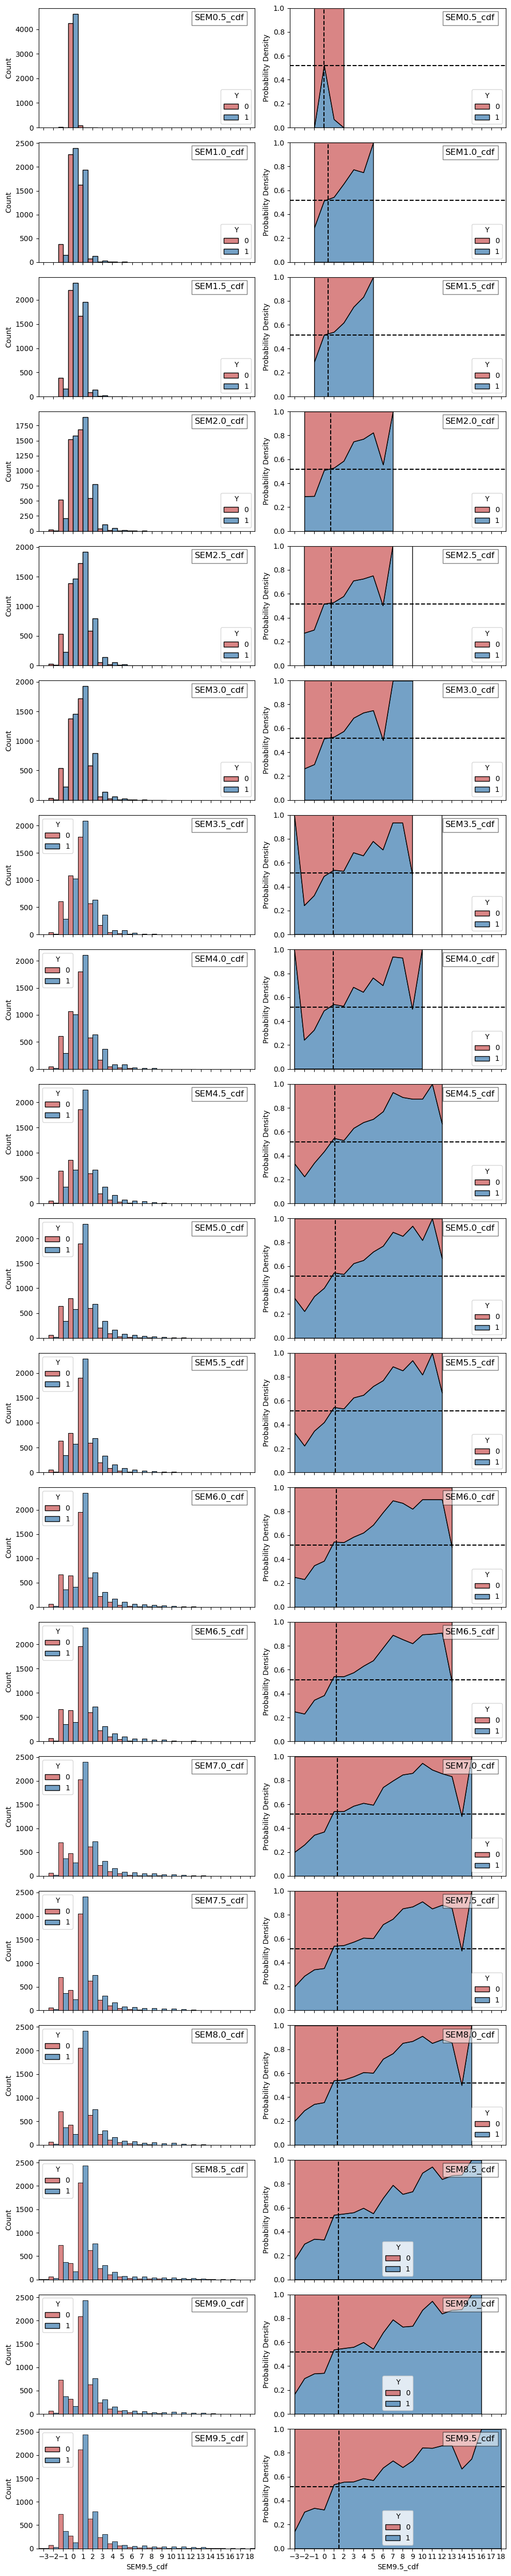

In [18]:
# Create a figure and axes
fig, axes = plt.subplots(len(sems), 2, figsize=(10, 50),sharex=True)
axes = axes.flatten()

# Plot the distribution of the cumulative number of courses taken in each semester
for i, sem in enumerate(sems):
    # Left subplot: raw counts
    sns.histplot(data=df, 
                 x=f'SEM{sem}_cdf', 
                 hue='Y', 
                 multiple='dodge', 
                 palette=palette, 
                 ax=axes[2*i], 
                 discrete=True)
    axes[2*i].set_xticks(range(int(df[f'SEM{sem}_cdf'].min()), int(df[f'SEM{sem}_cdf'].max()) + 1))
    axes[2*i].text(0.95, 0.95, f'SEM{sem}_cdf', transform=axes[2*i].transAxes, fontsize=12,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(facecolor='white', alpha=0.5))
    
    # Right subplot: probability densities
    sns.histplot(data=df, 
                 x=f'SEM{sem}_cdf', 
                 hue='Y', 
                 multiple='fill', 
                 element='poly',
                 palette=palette, 
                 ax=axes[2*i+1], 
                 discrete=True)
    axes[2*i+1].axhline(grad_rate, color='black', linestyle='--')
    axes[2*i+1].set_ylabel('Probability Density')
    axes[2*i+1].set_xticks(range(int(df[f'SEM{sem}_cdf'].min()), int(df[f'SEM{sem}_cdf'].max()) + 1))
    axes[2*i+1].axvline(df[f'SEM{sem}_cdf'].mean(), color='black', linestyle='--')
    axes[2*i+1].text(0.95, 0.95, f'SEM{sem}_cdf', transform=axes[2*i+1].transAxes, fontsize=12,
                     verticalalignment='top', horizontalalignment='right',
                     bbox=dict(facecolor='white', alpha=0.5))

#save the figure
plt.savefig('cdf_plots.png', bbox_inches='tight', pad_inches=1)

# Adjust layout
plt.tight_layout()
plt.show()



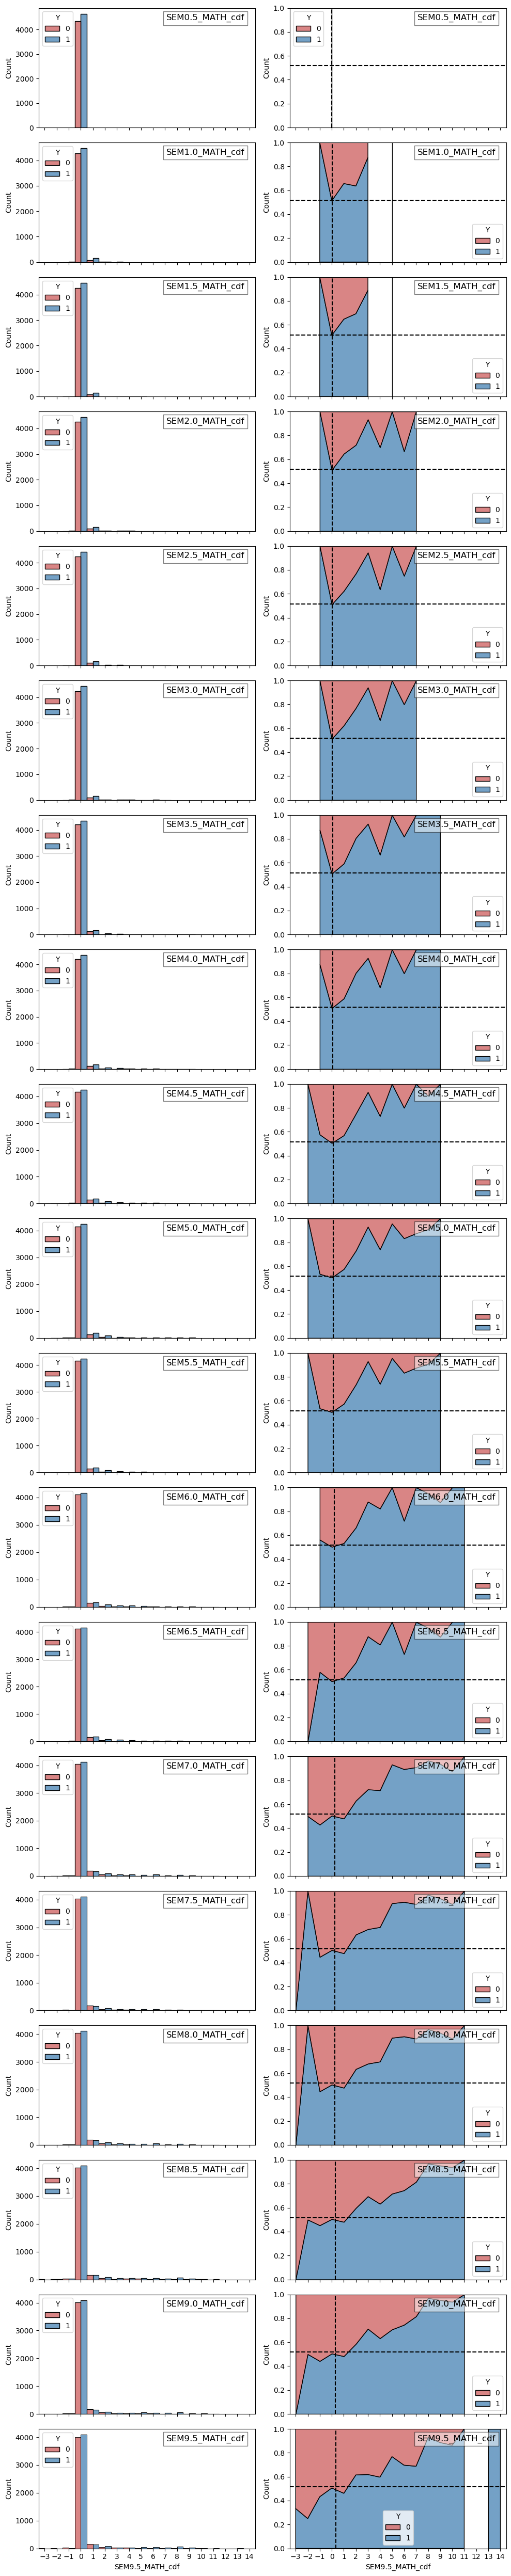

In [19]:
# Create a figure and axes
fig, axes = plt.subplots(len(sems), 2, figsize=(10, 50), sharex=True)
axes = axes.flatten()

# Plot the distribution of the cumulative number of math courses taken in each semester
for i, sem in enumerate(sems):
    # Left subplot: raw counts
    sns.histplot(data=df, 
                 x=f'SEM{sem}_MATH_cdf', 
                 hue='Y', 
                 multiple='dodge', 
                 palette=palette, 
                 ax=axes[2*i], 
                 discrete=True)
    axes[2*i].set_xticks(range(int(df[f'SEM{sem}_MATH_cdf'].min()), int(df[f'SEM{sem}_MATH_cdf'].max()) + 1))
    axes[2*i].text(0.95, 0.95, f'SEM{sem}_MATH_cdf', transform=axes[2*i].transAxes, fontsize=12,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(facecolor='white', alpha=0.5))
    
    # Right subplot: probability densities
    sns.histplot(data=df, 
                 x=f'SEM{sem}_MATH_cdf', 
                 hue='Y', 
                 multiple='fill', 
                 element='poly',
                 palette=palette, 
                 ax=axes[2*i+1], 
                 discrete=True)
    axes[2*i+1].axhline(grad_rate, color='black', linestyle='--')
    axes[2*i+1].set_xticks(range(int(df[f'SEM{sem}_MATH_cdf'].min()), int(df[f'SEM{sem}_MATH_cdf'].max()) + 1))
    axes[2*i+1].axvline(df[f'SEM{sem}_MATH_cdf'].mean(), color='black', linestyle='--')
    axes[2*i+1].text(0.95, 0.95, f'SEM{sem}_MATH_cdf', transform=axes[2*i+1].transAxes, fontsize=12,
                     verticalalignment='top', horizontalalignment='right',
                     bbox=dict(facecolor='white', alpha=0.5))

# Save the figure
plt.savefig('cdf_plots_math.png', bbox_inches='tight', pad_inches=1)

# Adjust layout
plt.tight_layout()
plt.show()


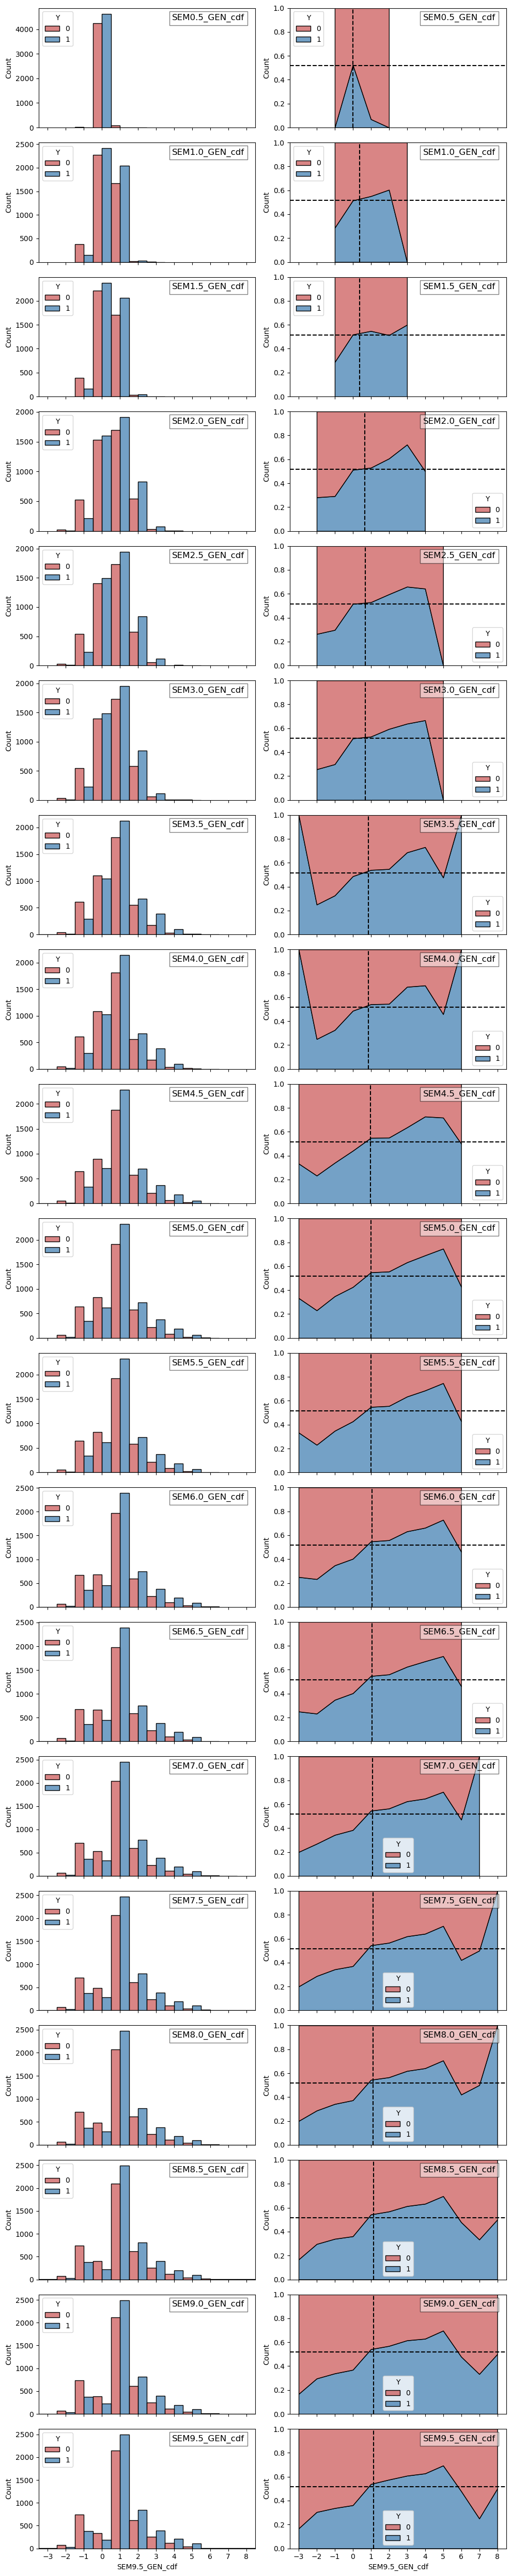

In [20]:
# Create a figure and axes
fig, axes = plt.subplots(len(sems), 2, figsize=(10, 50), sharex=True)
axes = axes.flatten()

# Plot the distribution of the cumulative number of general courses taken in each semester
for i, sem in enumerate(sems):
    # Left subplot: raw counts
    sns.histplot(data=df, 
                 x=f'SEM{sem}_GEN_cdf', 
                 hue='Y', 
                 multiple='dodge', 
                 palette=palette, 
                 ax=axes[2*i], 
                 discrete=True)
    axes[2*i].set_xticks(range(int(df[f'SEM{sem}_GEN_cdf'].min()), int(df[f'SEM{sem}_GEN_cdf'].max()) + 1))
    axes[2*i].text(0.95, 0.95, f'SEM{sem}_GEN_cdf', transform=axes[2*i].transAxes, fontsize=12,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(facecolor='white', alpha=0.5))
    
    # Right subplot: probability densities
    sns.histplot(data=df, 
                 x=f'SEM{sem}_GEN_cdf', 
                 hue='Y', 
                 multiple='fill', 
                 element='poly',
                 palette=palette, 
                 ax=axes[2*i+1], 
                 discrete=True)
    axes[2*i+1].axhline(grad_rate, color='black', linestyle='--')
    axes[2*i+1].set_xticks(range(int(df[f'SEM{sem}_GEN_cdf'].min()), int(df[f'SEM{sem}_GEN_cdf'].max()) + 1))
    axes[2*i+1].axvline(df[f'SEM{sem}_GEN_cdf'].mean(), color='black', linestyle='--')
    axes[2*i+1].text(0.95, 0.95, f'SEM{sem}_GEN_cdf', transform=axes[2*i+1].transAxes, fontsize=12,
                     verticalalignment='top', horizontalalignment='right',
                     bbox=dict(facecolor='white', alpha=0.5))

# Save the figure
plt.savefig('cdf_plots_gen.png', bbox_inches='tight', pad_inches=1)

# Adjust layout
plt.tight_layout()
plt.show()


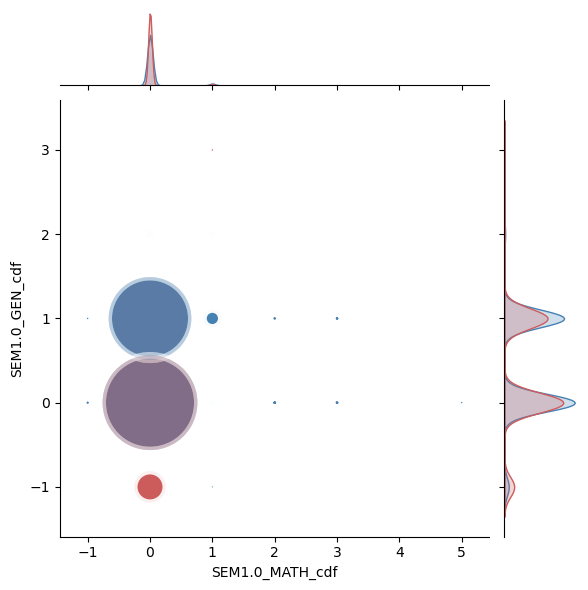

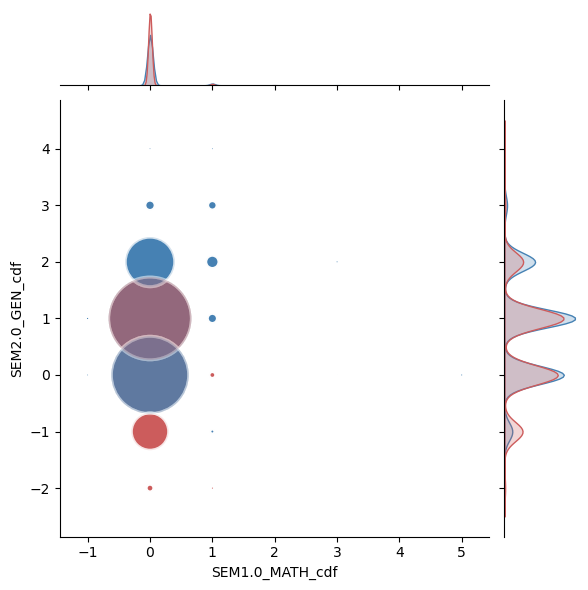

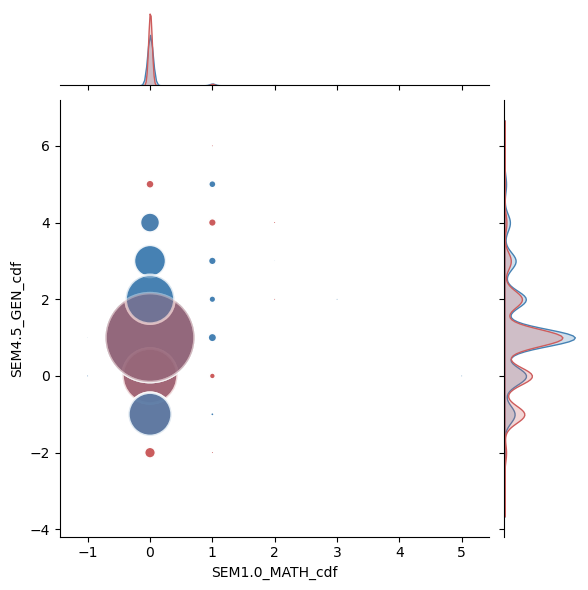

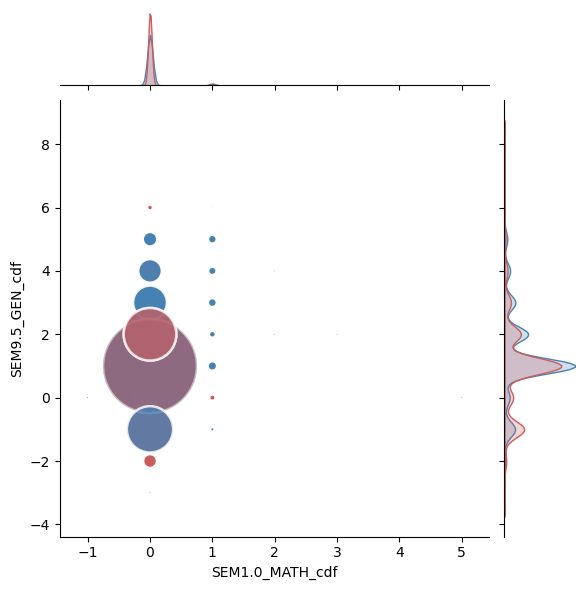

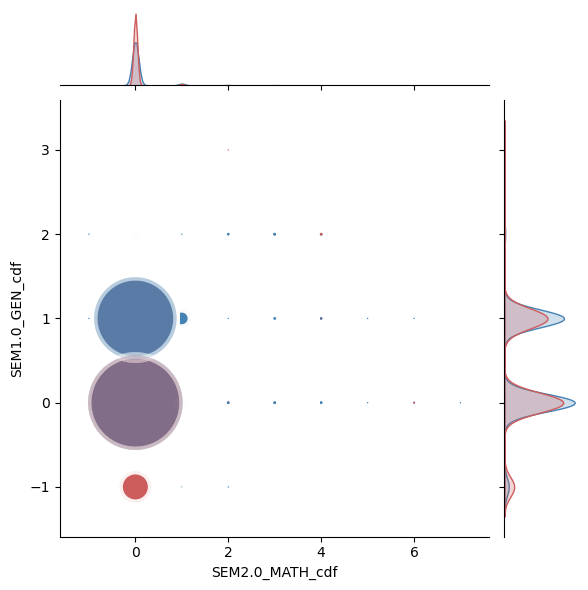

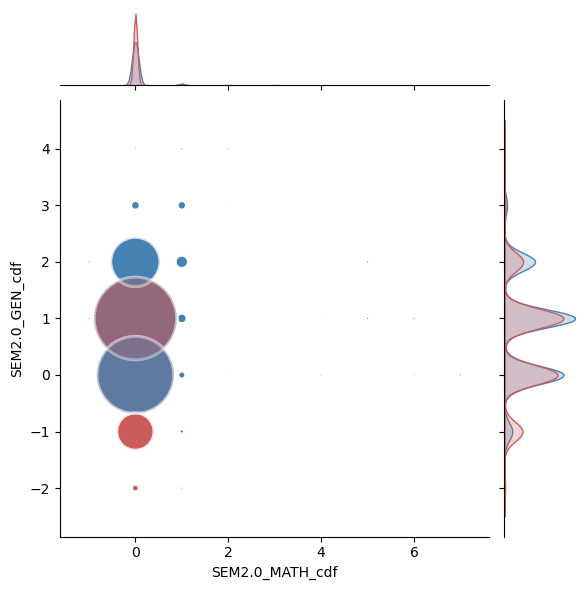

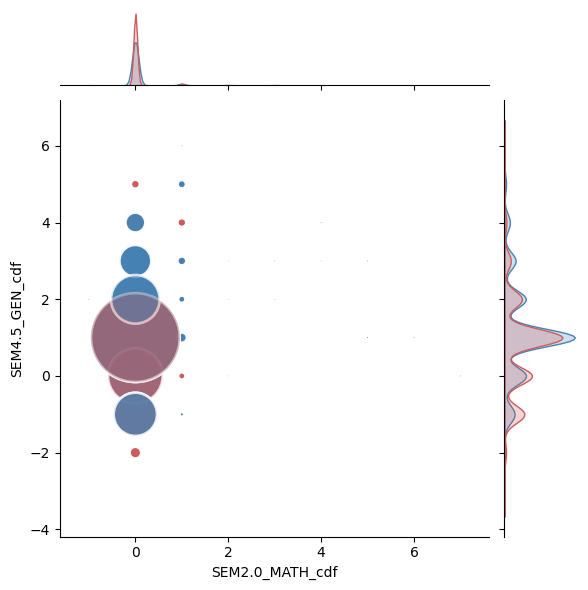

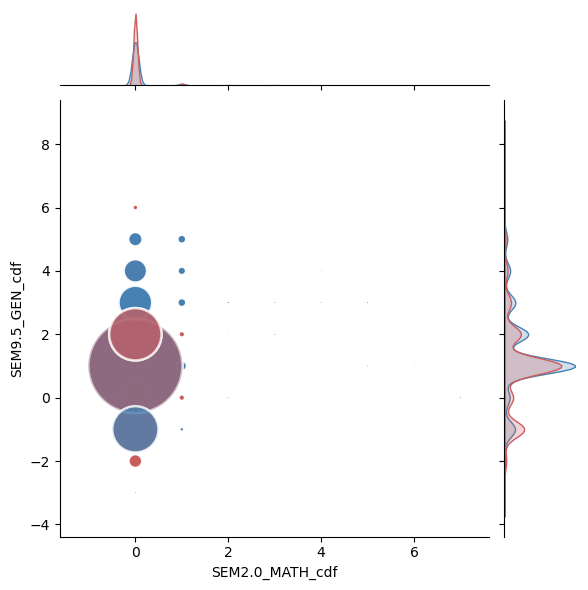

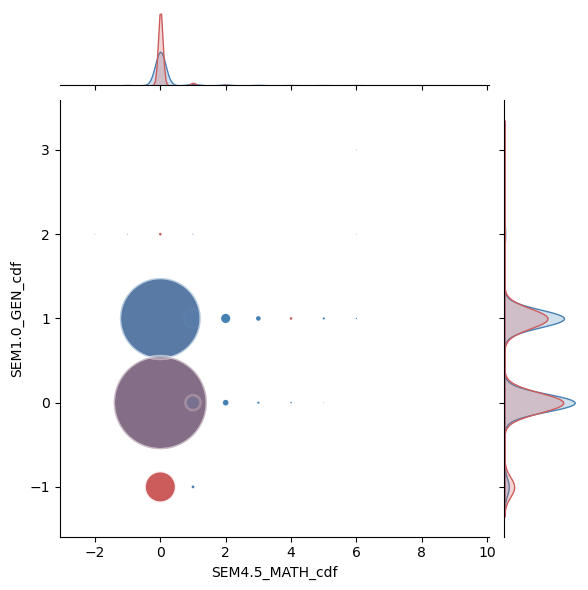

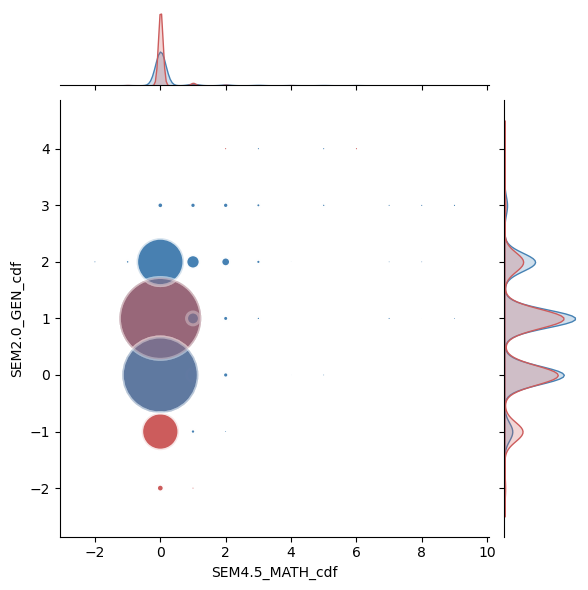

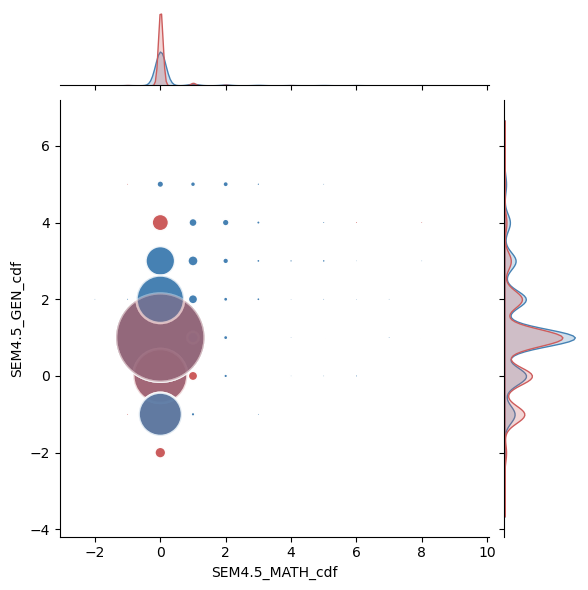

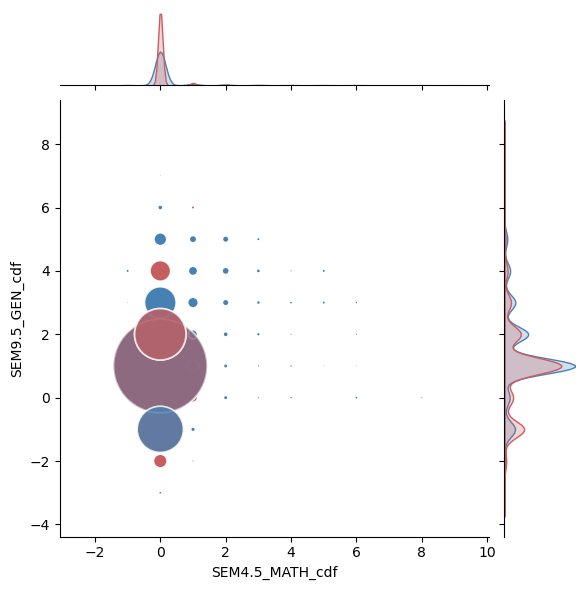

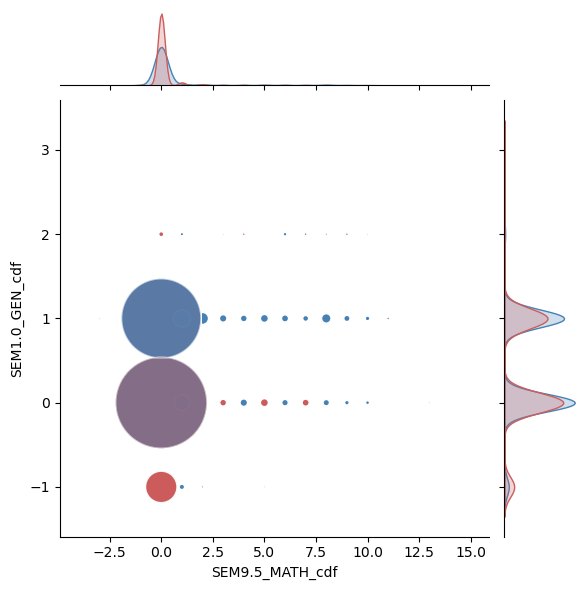

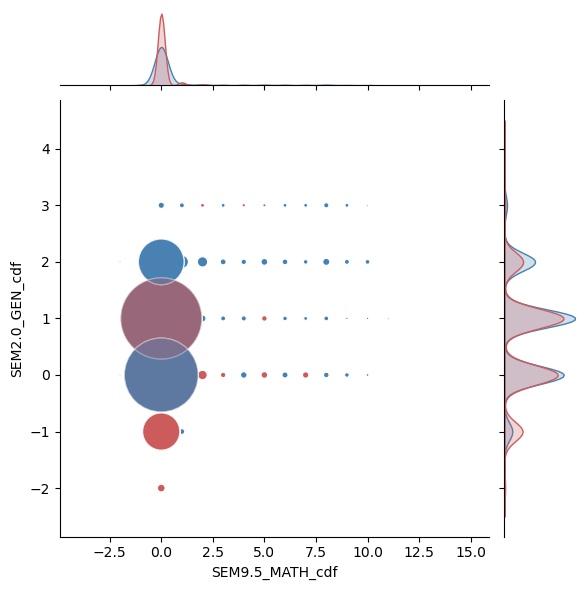

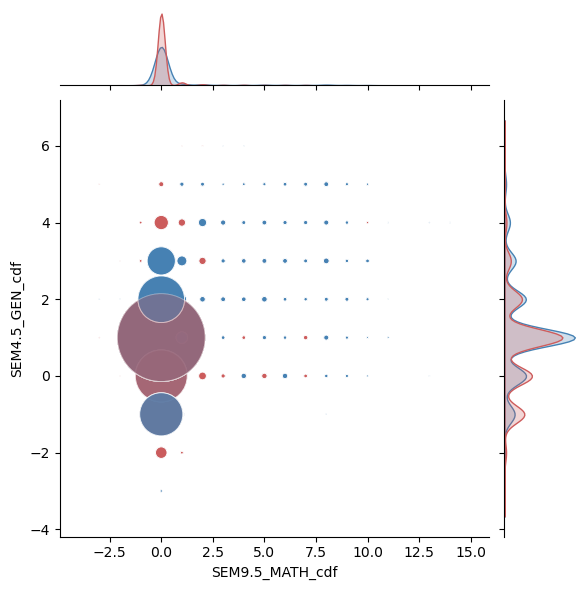

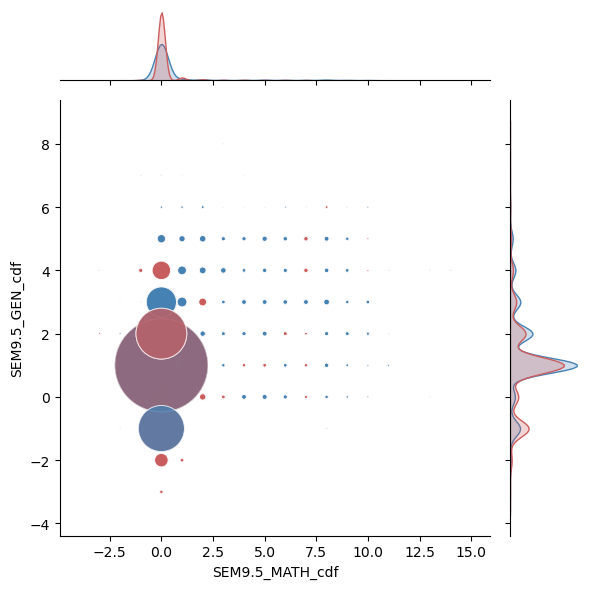

In [7]:
#for each math_cdf column and gen_cdf column, plot a jointplot of the two columns.
mysems = [1.0,2.0,4.5,9.5]
sem_pairs = [(s1, s2) for s1 in mysems for s2 in mysems]
index = 0

#make a 11x5 grid of subplots
# fig, ax = plt.subplots(9, 5, figsize=(10, 40))
# ax = ax.flatten()

#palette for coloring the points by the value of Y
palette = {0:'indianred', 1:'steelblue'}

#for each pair of distinct features in features_2 + top_courses[:6], plot a scatterplot of the two features. Color the points by the value of Y
for index, (s1, s2) in enumerate(sem_pairs):
    # Calculate the size of the dots based on the count of each pair of features
    f1 = f'SEM{s1}_MATH_cdf'
    f2 = f'SEM{s2}_GEN_cdf'
    counts = df.groupby([f1, f2]).size().reset_index(name='counts')
    merged_df = pd.merge(df, counts, on=[f1, f2])
    
    # Normalize counts to range between 0.3 and 1 for transparency
    norm_counts = 1 - 0.85*(merged_df['counts'] - merged_df['counts'].min()) / (merged_df['counts'].max() - merged_df['counts'].min())
    
    sns.jointplot(x=f1, 
                  y=f2, 
                  data=merged_df, 
                  hue='Y', 
                  palette=palette,
                  alpha=norm_counts,  # transparency varies with the count
                  s=merged_df['counts'],  # size of the dot varies with the count
                  legend=False)  # remove the legend from each subplot
    plt.xlabel(f1)
    plt.ylabel(f2)
    #save figure to the folder 'jointplots' with the name 'jplot_{feature1}_vs_{feature2}.png'
    plt.savefig(f'cdf_jointplots/MATH{s1}_vs_GEN{s2}.png')
    index += 1

plt.tight_layout()
plt.show()

In [21]:
new_dict = {'GEN_leq_0': df.index[df['SEM9.5_GEN_cdf'] <= 0].tolist(),
            'GEN_eq_12': df.index[df['SEM9.5_GEN_cdf'].isin([1, 2])].tolist(),
            'GEN_geq_3': df.index[df['SEM9.5_GEN_cdf'] >= 3].tolist(),
            'MATH_leq_0': df.index[df['SEM9.5_MATH_cdf'] <= 0].tolist(),
            'MATH_eq_12': df.index[df['SEM9.5_MATH_cdf'].isin([1, 2])].tolist(),
            'MATH_geq_3': df.index[df['SEM9.5_MATH_cdf'] >= 3].tolist()}

#for each list in new_dict, print the length of the list, and the mean value of 'GRADUATE' for the students in the list
for key, value in new_dict.items():
    print(f'{key}: {len(value)/len(df) * 100}, {df.loc[value, "Y"].mean() * 100}')

list(new_dict.keys())
gen_keys = ['GEN_leq_0',
 'GEN_eq_12',
 'GEN_geq_3']
math_keys = ['MATH_leq_0','MATH_eq_12']

#compute all intersectoins of the lists corresponding to gen_keys with lists coreponsing to math_keys
#store the sizes of the intersections in a dictionary
d = {}
for key1 in gen_keys:
    for key2 in math_keys:
        intersection = list(set(new_dict[key1]).intersection(new_dict[key2]))
        d[f'{key1} and {key2}'] = [len(intersection) / len(df) * 100, df.loc[intersection, 'Y'].mean() * 100]
d['MATH_geq_3'] = [len(new_dict['MATH_geq_3']) / len(df) * 100, df.loc[new_dict['MATH_geq_3'], 'Y'].mean() * 100]
#convert the dictionary d into a DataFrame
df_genmath = pd.DataFrame(d).T
df_genmath.columns = ['Size (%)', 'Grad rate (%)']
df_genmath['Weighted grad rate (%)'] = df_genmath['Size (%)'] * df_genmath['Grad rate (%)'] / 100
df_genmath['Weighted NG rate (%)'] = df_genmath['Size (%)'] * (100 - df_genmath['Grad rate (%)']) / 100

#add a row at the end with the totals of each column
df_genmath.loc['Total'] = df_genmath.sum()

df_genmath

GEN_leq_0: 19.435179008227706, 34.1533180778032
GEN_eq_12: 67.82299310651545, 54.704918032786885
GEN_geq_3: 12.741827885256837, 62.04188481675392
MATH_leq_0: 90.5381365354681, 50.472798722829424
MATH_eq_12: 4.803202134756504, 50.92592592592593
MATH_geq_3: 4.658661329775406, 75.17899761336515


,Size (%),Grad rate (%),Weighted grad rate (%),Weighted NG rate (%)
GEN_leq_0 and MATH_leq_0,17.656215,32.871537,5.803869,11.852346
GEN_leq_0 and MATH_eq_12,1.122971,34.653465,0.389148,0.733823
GEN_eq_12 and MATH_leq_0,65.065599,54.528366,35.479208,29.586391
GEN_eq_12 and MATH_eq_12,1.489882,45.522388,0.678230,0.811652
GEN_geq_3 and MATH_leq_0,7.816322,56.472262,4.414054,3.402268
GEN_geq_3 and MATH_eq_12,2.190349,62.944162,1.378697,0.811652
MATH_geq_3,4.658661,75.178998,3.502335,1.156326
Total,100.000000,362.171178,51.645541,48.354459


In [ ]:
# Visualize the lines of best fit for the students, set the hue to 'Y' and use the previously defined palette. Create a separate subplot for each of the dataframes df_gen_pos, df_gen_neg, df_math_pos, df_math_neg, df_pos, and df_neg (2 in each row)


#make a figure and axes
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

#plot the lines of best fit for the students in df_gen_pos
sample = df_gen_pos.sample(500)
for i, row in df_gen_pos.iterrows():
    x = np.array(range(1, 9))
    slope = row['slp_gen']
    intercept = row['int_gen']
    axs[0, 0].plot(x, 
                   slope * x + intercept, 
                   color=palette[row['Y']], 
                   alpha=0.7,
                   linewidth=0.2)
axs[0,0].text(0.5, 0.5, f'{500} out of {len(df_gen_pos)}', horizontalalignment='center', verticalalignment='center', transform=axs[0,0].transAxes)
axs[0, 0].set_title('SEM8_gen_cdf > 0')

#plot the lines of best fit for the students in df_gen_neg
sample = df_gen_neg.sample(500)
for i, row in df_gen_neg.iterrows():
    x = np.array(range(1, 9))
    slope = row['slp_gen']
    intercept = row['int_gen']
    axs[0, 1].plot(x, 
                   slope * x + intercept, 
                   color=palette[row['Y']], 
                   alpha=0.7,
                   linewidth=0.2)
axs[0, 1].set_title('SEM8_gen_cdf <= 0')
axs[0,1].text(0.5, 0.5, f'{500} out of {len(df_gen_neg)}', horizontalalignment='center', verticalalignment='center', transform=axs[0,1].transAxes)

#plot the lines of best fit for the students in df_math_pos
sample = df_math_pos.sample(500)
for i, row in df_math_pos.iterrows():
    x = np.array(range(1, 9))
    slope = row['slp_math']
    intercept = row['int_math']
    axs[1, 0].plot(x, 
                   slope * x + intercept, 
                   color=palette[row['Y']], 
                   alpha=0.7,
                   linewidth=0.2)
axs[1, 0].set_title('SEM8_math_cdf > 0')
axs[1,0].text(0.5, 0.5, f'{500} out of {len(df_math_pos)}', horizontalalignment='center', verticalalignment='center', transform=axs[1,0].transAxes)

#plot the lines of best fit for the students in df_math_neg
sample = df_math_neg.sample(500)
for i, row in df_math_neg.iterrows():
    x = np.array(range(1, 9))
    slope = row['slp_math']
    intercept = row['int_math']
    axs[1, 1].plot(x, 
                   slope * x + intercept, 
                   color=palette[row['Y']], 
                   alpha=0.7,
                   linewidth=0.2)
axs[1, 1].set_title('SEM8_math_cdf <= 0')
axs[1,1].text(0.5, 0.5, f'{500} out of {len(df_math_neg)}', horizontalalignment='center', verticalalignment='center', transform=axs[1,1].transAxes)

#plot the lines of best fit for the students in df_pos
sample = df_pos.sample(500)
for i, row in df_pos.iterrows():
    x = np.array(range(1, 9))
    slope = row['slp_math']
    intercept = row['int_math']
    axs[2, 0].plot(x, 
                   slope * x + intercept, 
                   color=palette[row['Y']], 
                   alpha=0.7,
                   linewidth=0.2)
axs[2, 0].set_title('SEM8_cdf > 0')
axs[2,0].text(0.5, 0.5, f'{500} out of {len(df_pos)}', horizontalalignment='center', verticalalignment='center', transform=axs[2,0].transAxes)

#plot the lines of best fit for the students in df_neg
sample = df_neg.sample(500)
for i, row in df_neg.iterrows():
    x = np.array(range(1, 9))
    slope = row['slp_gen']
    intercept = row['int_gen']
    axs[2, 1].plot(x, 
                   slope * x + intercept, 
                   color=palette[row['Y']], 
                   alpha=0.7,
                   linewidth=0.2)
axs[2, 1].set_title('SEM8_cdf <= 0')
axs[2,1].text(0.5, 0.5, f'{500} out of {len(df_neg)}', horizontalalignment='center', verticalalignment='center', transform=axs[2,1].transAxes)

plt.tight_layout()
plt.show()

In [32]:
courses = ['25',
 '101',
 '104',
 '105',
 '106',
 '140',
 '142',
 '143',
 '150',
 '151',
 '160',
 '165',
 '166',
 '181',
 '201',
 '207',
 '240',
 '265',
 '266',
 '267',
 '301',
 '302',
 '304',
 '314',
 '317',
 '341',
 '342',
 '350',
 '365',
 '373',
 '385',
 '397',
 '414',
 '415',
 '435',
 '436',
 '492',
 '495',
 '500']

In [ ]:


#create a dataframe containing those students for whom SEM8_gen_cdf is greater than 0
df_gen_pos = df[df['SEM8_gen_cdf'] > 0]
df_gen_neg = df[df['SEM8_gen_cdf'] <= 0]
df_math_pos = df[df['SEM8_math_cdf'] > 0]
df_math_neg = df[df['SEM8_math_cdf'] <= 0]
df_pos = df[df['SEM8_cdf'] > 0]
df_neg = df[df['SEM8_cdf'] <= 0]

#print lengths of all dataframes
print(f'Length of df: {len(df)}')
print(f'Length of df_gen_pos: {len(df_gen_pos)}')
print(f'Length of df_gen_neg: {len(df_gen_neg)}')
print(f'Length of df_math_pos: {len(df_math_pos)}')
print(f'Length of df_math_neg: {len(df_math_neg)}')
print(f'Length of df_pos: {len(df_pos)}')
print(f'Length of df_neg: {len(df_neg)}')

KeyError: 'SEM8_gen_cdf'

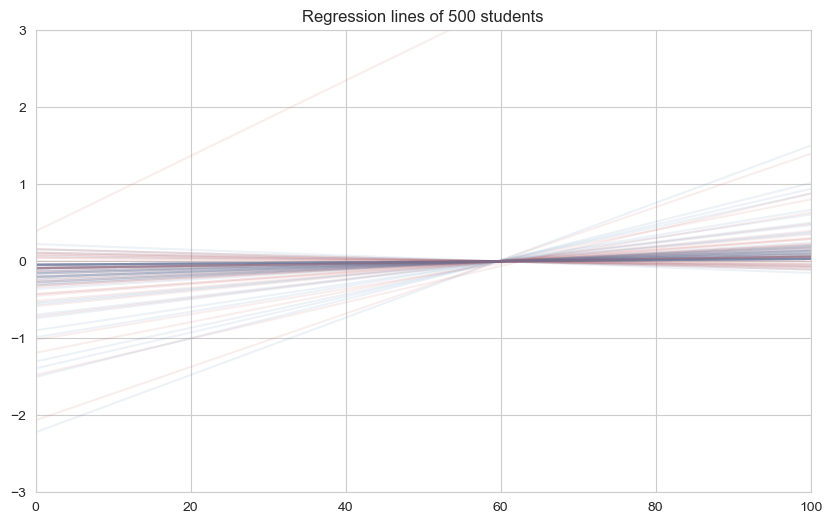

In [43]:
#use the slope and intercept columns to visualize student performance regression lines. Color the lines based on df['Y'], use the palette.
fig, ax = plt.subplots(figsize=(10, 6))

#sample 1000 students
df_sample = df.sample(n=100)
for i, student in df_sample.iterrows():
    x = np.array([0, 100])
    y = student['slope']*x + student['intercept']
    sns.lineplot(x = x,
                 y = y,
                 color = palette[student['Y']],
                 alpha = 0.1,
                 ax = ax)
    ax.set_xlim(0,100)
    ax.set_ylim(-3,3)
    ax.set_title('Regression lines of 500 students')

plt.show()

In [ ]:


# #create a dataframe containing those students for whom SEM8_gen_cdf is greater than 0
# df_gen_pos = df[df['SEM8_gen_cdf'] > 0]
# df_gen_neg = df[df['SEM8_gen_cdf'] <= 0]
# df_math_pos = df[df['SEM8_math_cdf'] > 0]
# df_math_neg = df[df['SEM8_math_cdf'] <= 0]
# df_pos = df[df['SEM8_cdf'] > 0]
# df_neg = df[df['SEM8_cdf'] <= 0]

# #print lengths of all dataframes
# print(f'Length of df: {len(df)}')
# print(f'Length of df_gen_pos: {len(df_gen_pos)}')
# print(f'Length of df_gen_neg: {len(df_gen_neg)}')
# print(f'Length of df_math_pos: {len(df_math_pos)}')
# print(f'Length of df_math_neg: {len(df_math_neg)}')
# print(f'Length of df_pos: {len(df_pos)}')
# print(f'Length of df_neg: {len(df_neg)}')

/var/folders/8h/w7q1fjwd5kn8xvqty5sp3h7r0000gn/T/ipykernel_88125/2496493695.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.0026321085934822835' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'slope'] = S
/var/folders/8h/w7q1fjwd5kn8xvqty5sp3h7r0000gn/T/ipykernel_88125/2496493695.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.15702410362977462' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'intercept'] = I
